# Simple component separation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import healpy as hp
import pysm

from fgbuster.observation_helpers import get_instrument, get_sky
from fgbuster.component_model import CMB, Dust, Synchrotron
from fgbuster.separation_recipes import basic_comp_sep
from fgbuster.visualization import corner_norm

## Simulate your frequency maps
You have some frequecy maps to clean, they can be either data or simulations. For example, you can use `pysm` to simulate microwave skys with different complexities. ForeGroundBuster adds a couple of functions that make the process even easier.

In [2]:
nside = 32
sky = pysm.Sky(get_sky(nside, 'c1d0s0'))
instrument = pysm.Instrument(get_instrument('litebird', nside))
freq_maps = instrument.observe(sky, write_outputs=False)[0]
freq_maps = freq_maps[:, 1:]  # Select polarization

/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


nu (GHz) | sigma_I (uK_CMB amin) | sigma_P (uK_CMB amin) | FWHM (arcmin) 

0040.00 | 25.60 | 36.10 | 00.00 
0050.00 | 13.90 | 19.60 | 00.00 
0060.00 | 14.33 | 20.20 | 00.00 
0068.40 | 08.01 | 11.30 | 00.00 
0078.00 | 07.30 | 10.30 | 00.00 
0088.50 | 05.96 | 08.40 | 00.00 
0100.00 | 04.96 | 07.00 | 00.00 
0118.90 | 04.11 | 05.80 | 00.00 
0140.00 | 03.33 | 04.70 | 00.00 
0166.00 | 04.96 | 07.00 | 00.00 
0195.00 | 04.11 | 05.80 | 00.00 
0234.90 | 05.67 | 08.00 | 00.00 
0280.00 | 06.45 | 09.10 | 00.00 
0337.40 | 08.09 | 11.40 | 00.00 
0402.10 | 13.90 | 19.60 | 00.00 
Instrument attribute 'pixel_indices' not set.


## Define what you fit for
Create your sky model as a list of components

In [3]:
components = [CMB(), Dust(150.), Synchrotron(20.)]

## Component separation
The tools inside ForeGroundBuster allow for very flexible and diverse component separation approaches. However, we also provide a set of predefined function that perform component separation out of the box. They suit most common use cases.

In [4]:
result = basic_comp_sep(components, instrument, freq_maps)

## Explore the results
You have just solved for both the spectral parameters of your components and their amplitudes.

Get the spectral parameters name and values with

In [5]:
print(result.params)
print(result.x)

['Dust.beta_d', 'Dust.temp', 'Synchrotron.beta_pl']
[ 1.54 20.   -3.  ]


You can also have a look at their semi-analytic covariance, but remember that it is accurate only the high signal-to-noise regime

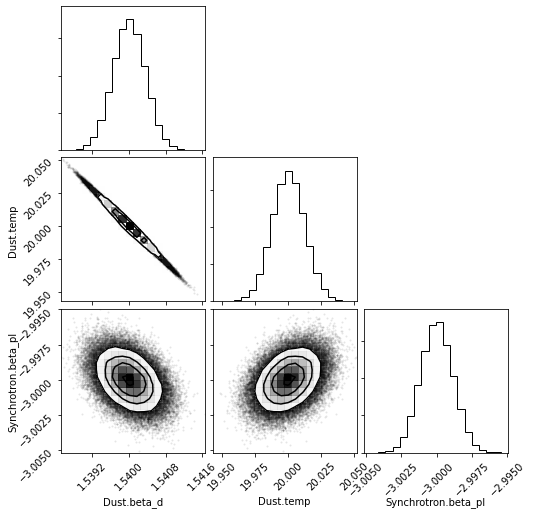

In [6]:
corner_norm(result.x, result.Sigma, labels=result.params)

The amplitudes of the components are stacked in the ``s`` attribute and they are in the same format of the input frequency maps: Q and U healpix maps, in this case.

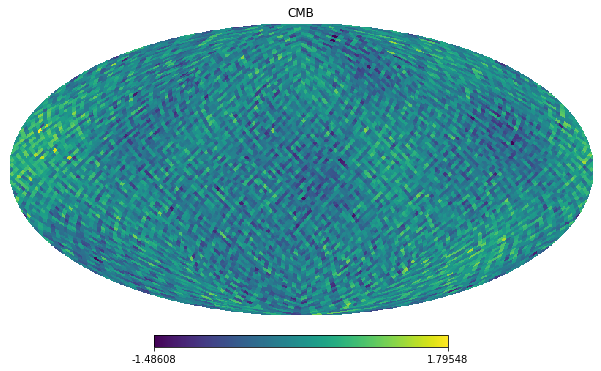

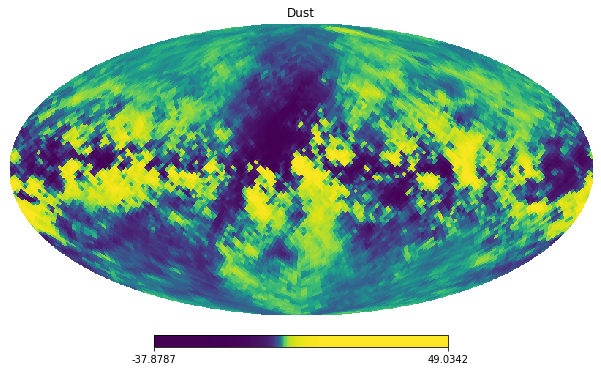

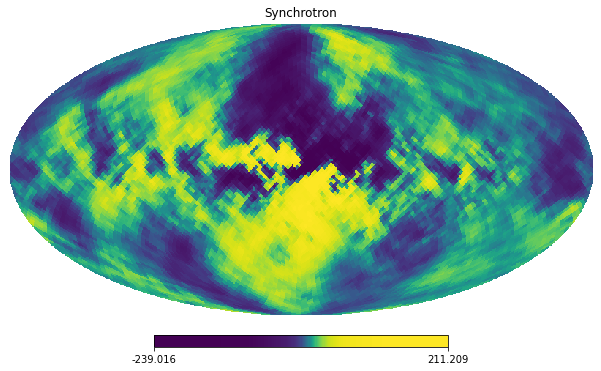

In [7]:
hp.mollview(result.s[0,1], title='CMB')
hp.mollview(result.s[1,1], title='Dust', norm='hist')
hp.mollview(result.s[2,1], title='Synchrotron', norm='hist')